# Stroop Effect Analysis

### Question 1: What are the independent and dependent variables ?
**Answer:** The dependent variable is the **time taken to complete the naming of the colors**. The independent variable is whether the **colors shown are congruent or not**. Congruence in this context means that color correspond to their name printed on the screen. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

In [3]:
stroop_data = pd.read_csv('stroopdata.csv');
print "Stroop data read successfully !"

Stroop data read successfully !


In [4]:
print stroop_data

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


### Question 2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Answer: ** The data is for a sample from a population and we are trying to infer about the population. This is why we use t-tests (when the population parameters are not known). Let us name **population parameter for mean of congruent reading times to be *μ*<sub>C</sub>** and **population parameter for mean of incongruent reading times to be *μ*<sub>I</sub>** and further for this data set, null hypotheses should be that, there is no change in mean reading times in both cases. Alternative hypotheses should be that, there is an increase in mean reading times when the colors are incongruent. 

**H<sub>0</sub>** (null hypotheses): No change in reading times. (*μ*<sub>I</sub> - *μ*<sub>C</sub> = 0)
 
**H<sub>A</sub>** (alternative hypotheses): Reading time in Incongruent case increases. (*μ*<sub>I</sub> - *μ*<sub>C</sub> ≥ 0)

Since this appears like a case, where reading tests are performed on the same set of people for two different conditions. We should perform a dependent t-test for paired samples. 

Assumptions made for a dependent t-test for paired samples are: 
1. The sample of differences should be roughly normal.
2. Samples should be dependent and it should be possible to pair them.
3. The obvious requirement that both samples should be of equal size.

As cited from [here](http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/), t-test is a better choice than z-test when the population parameters are unknown and the sample size is smaller than 30. Both of which are true in this case and hence it is justified to use the t-test. If the sample sizes are same then t-test is [robust to unequal variances](https://en.wikipedia.org/wiki/Student%27s_t-test#Assumptions). As this is a dependent t-test where sample size is same, even though difference in variance is there, t-test should work.

### Question 3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

**Answer: **

In [16]:
stroop_data_summary = stroop_data.describe()
mean_congruent = stroop_data_summary['Congruent'].loc['mean']
mean_incongruent = stroop_data_summary['Incongruent'].loc['mean']
std_congruent = stroop_data_summary['Congruent'].loc['std']
std_incongreunt = stroop_data_summary['Incongruent'].loc['std']

print "Mean Congruent reading times: {:.2f} s".format(mean_congruent)
print "Mean Incongruent reading times: {:.2f} s".format(mean_incongruent)
print "Standard deviation of Congruent reading times: {:.2f} s".format(std_congruent)
print "Standard deviation of Incongruent reading times: {:.2f} s".format(std_incongreunt)

Mean Congruent reading times: 14.05 s
Mean Incongruent reading times: 22.02 s
Standard deviation of Congruent reading times: 3.56 s
Standard deviation of Incongruent reading times: 4.80 s


### Question 4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

**Answer: ** 

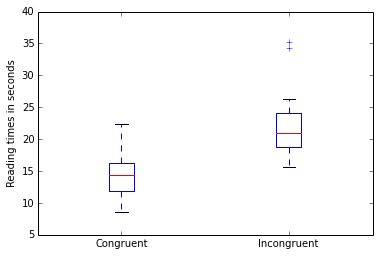

In [18]:
stroop_data.plot.box()
pl.ylabel('Reading times in seconds')

pl.show()

As we can see from the plots itself that, congruent reading times overall are lesser than that of incongreunt reading times. Congruent reading times lower quartile and upper quartile range from roughly 12 to 16  while incongruent reading times range from 18 to 24. Further more as the calculated standard deviations shows, we can see that standard deviation of incongruent reading times is higher, as there are outliers. (which only increase the variablity of data)

### Question 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**Answer: ** Since our alternative hypotheses is that the reading times have increased, we will perform a one-tailed t-test. Taking an *α* level of 0.05, we get the t-statistic for a degree of freedom of 23, equal to 1.714. Now we can quickly do a t-test to determine whether the change is statisically significant or not. Before that we need to prepare the data. 

In [13]:
difference = stroop_data['Incongruent'] - stroop_data['Congruent']
difference_summary = difference.describe()
mean_difference = difference_summary.loc['mean']
std_difference = difference_summary.loc['std']

print "Mean of the difference is {:.4f} s".format(mean_difference)
print "Standard deviation of the difference is {:.4f} s".format(std_difference)

Mean of the difference is 7.9648 s
Standard deviation of the difference is 4.8648 s


Now we have all the ingredients to do the data t-test. First we will calculate the t-statistic which is given by 
(mean - 0) / (sigma/sqrt(n))

In [15]:
t_statistic = mean_difference / (std_difference / np.sqrt(24))
print "t-statistic for the test is {:.4f}".format(t_statistic)

t-statistic for the test is 8.0207


We can clearly see that this is much larger than the critical value of 1.714 and it's p-value is less than 0.0001 and hence it is stastically significant. Therefore we can reject the null, which means we can 'accept' our alternative hypotheses that the reading times in case of incongruent colors are statistically higher and different.

### Question 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer :** There have been various theories on explaining the stroop effect. Citing from the wikipedia, I think that it is because our brain processes words much faster than colors and we need more attention in figuring out the color compared to the word. 

An alternative task (which has already been performed) and is an extension to the classic stroop test is the emotional stroop test. In emotional stroop test, the task is to name the colors of depressing words compared to normal words. In another type of stroop test, people suffering from a phobia are shown words related to phobia vs words not related to phobia and it has been found that they can name the colors of non-phobic words faster.